# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [3]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

inline_rc = dict(mpl.rcParams)

data = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet-CosmicWatch-ipynb/main/CW_A_Data2023_Jul_10.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,6451,399,87.30,1483,26.05
1,2,13640,355,68.30,2777,26.05
2,3,14714,480,130.21,2964,26.05
3,4,21895,608,202.86,4266,26.05
4,5,25540,433,104.37,5015,26.05
...,...,...,...,...,...,...
9402,9403,81949268,377,76.28,15309391,27.67
9403,9404,81954456,361,70.62,15310329,27.67
9404,9405,81955533,403,88.99,15310520,27.67
9405,9406,81977392,402,87.25,15314636,27.67


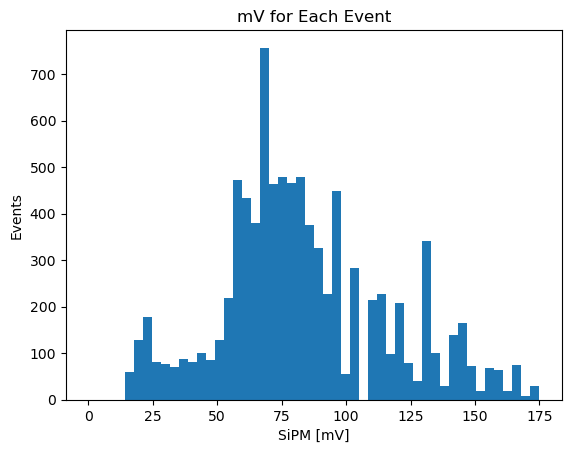

In [4]:
# This makes a histogram of that totally useless calculation above
plt.hist(data.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

In [5]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = round(data.Minute,1)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,6451,399,87.30,1483,26.05,4968,0 days 00:00:04.968000,0.1,0.201288
1,2,13640,355,68.30,2777,26.05,10863,0 days 00:00:10.863000,0.2,0.184111
2,3,14714,480,130.21,2964,26.05,11750,0 days 00:00:11.750000,0.2,0.255319
3,4,21895,608,202.86,4266,26.05,17629,0 days 00:00:17.629000,0.3,0.226899
4,5,25540,433,104.37,5015,26.05,20525,0 days 00:00:20.525000,0.3,0.243605
...,...,...,...,...,...,...,...,...,...,...
9402,9403,81949268,377,76.28,15309391,27.67,66639877,0 days 18:30:39.877000,1110.7,0.141102
9403,9404,81954456,361,70.62,15310329,27.67,66644127,0 days 18:30:44.127000,1110.7,0.141108
9404,9405,81955533,403,88.99,15310520,27.67,66645013,0 days 18:30:45.013000,1110.8,0.141121
9405,9406,81977392,402,87.25,15314636,27.67,66662756,0 days 18:31:02.756000,1111.0,0.141098


In [ ]:
Data5Min = pd.DataFrame()
#data[(data['Minute']==5)].index[0]

endRange = round((data.UpTime.max())/300000)+1

for i in range(0,len(data)):
    j = 0
    while j < endRange:
        h = data.iloc[i,data.columns.get_loc("MinDiv5")]
        k = j*5
        if h >= k and h <= k + 0.1:
            Data5Min = data.iloc[i]
            j = j+1
        else:
            moveon = 1
Data5Min